### GMM 클러스터링 기법
데이터를 분석하는 방법 중 하나이다. GMM은 Gausian Mixture Model의 약자로 특정한 집단이 있을 때 각각의 부분 집단의 데이터가 가우시안 분포를 따른다는 가정하에 이루어지는 분석모델이다.      
이에 따르면 다양한 부분 집단이 모여서 하나의 큰 집단을 이루게 된다면 각각의 데이터는 원래 어떤 부분집단에 들어가 있는지 추정할 수 있다는 것이다.     
즉 두가지 분포가 있고, 어떤 데이터 포인트가 들어가면 들어간 데이터 포인터가 어느 분포에 속해있는지 나타내준다는 것이다.     
이것을 활용해서 클러스터링을 할 수 있다.

In [1]:
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
iris = sns.load_dataset('iris')

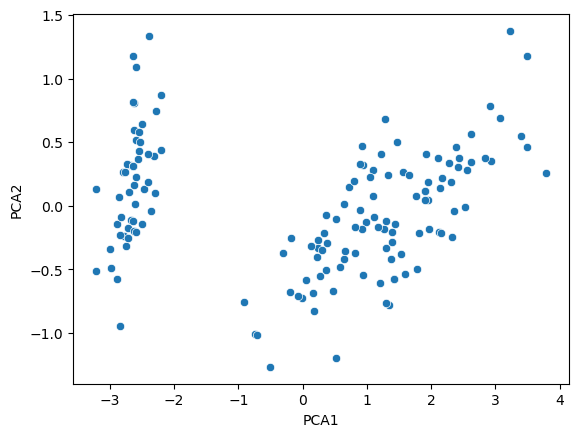

In [2]:
iris_pca = pca.fit_transform(iris.iloc[:,:-1])
iris_pca_df = pd.DataFrame(iris_pca,columns=['PCA1','PCA2'])

sns.scatterplot(data=iris_pca_df,x='PCA1',y='PCA2')
plt.show()

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


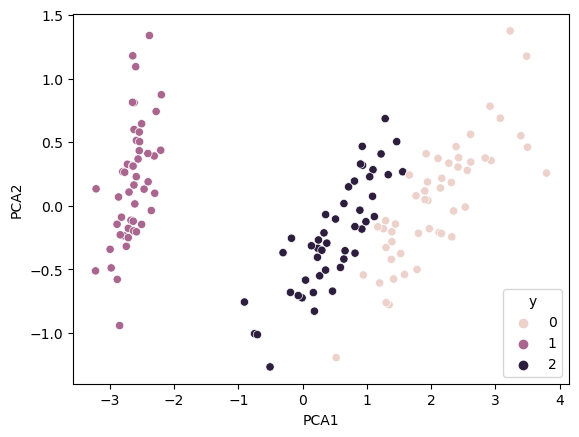

In [3]:
# GMM 클러스터링
gmm = GaussianMixture(n_components=3,random_state=42)
gmm_y = gmm.fit_predict(iris_pca_df)

iris_pca_df['y'] = gmm_y

sns.scatterplot(iris_pca_df,x='PCA1',y='PCA2',hue='y')
plt.show()

C:\Users\BIG3-09\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


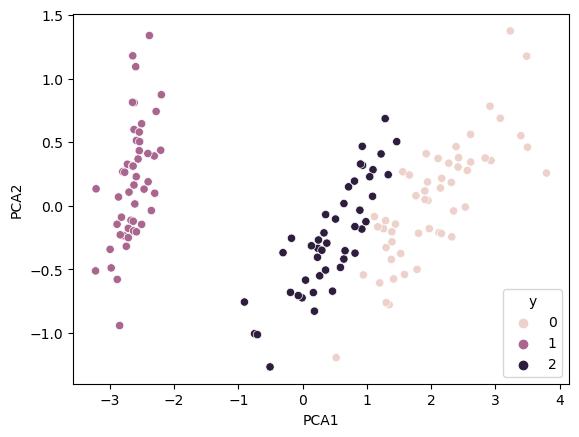

In [6]:
#근데 왜 pca에다가 클러스터링을 하지? 원래 데이터에 클러스터링을하고 입히는게 낫다고 생각된다. 
gmm = GaussianMixture(n_components=3,random_state=42)
gmm_y = gmm.fit_predict(iris.drop('species',axis=1))

iris_pca_df['y'] = gmm_y

sns.scatterplot(iris_pca_df,x='PCA1',y='PCA2',hue='y')
plt.show()
#근데 애초에 feature 차원이 3이였고 분류도 잘되어있어서 딱히 상관없었던 것 같다 ㅎ

### 앙상블 모델 
앙상블 모델이란 여러개의 분류기를 생성하고 그 예측을 결합해서 정확한 예측을 얻는 기법이다.      

#### 보팅(voting)
여러개의 분류기가 투표를 통해서 예측결과를 결정한다.       
서로 다른 알고리즘 여러개를 사용한다.      
종류에는 하드보팅(다수결)과 소프트 보팅(확률 평균 중 가장 높은것)이 있다.     

#### 배깅(bagging)
Booststrap Aggregation의 줄임말이다. 데이터 샘플링을 통해서 모델을 학습시키고 결과를 집계한다.     
일정부분 데이터는 model 1, 다른 부분은 model 2.... 와 같은 형식으로 한다.     
모두 같은 유형의 알고리즘을 사용하는 것이 특징이고 랜덤포레스트가 여기에 해당한다.      
데이터를 샘플링하기 때문에 분산이 줄어들고 과적합을 어느정도 방지할 수 있다.     

#### 부스팅(boosting)
여러개의 분류기가 순차적으로 학습을 한다.    
이전 분류기에서 틀린 데이터에 대해서 가중치를 줘서 다음 분류기에서 잘 맞출 수 있도록 한다.     
하지만 순차적으로 학습하기 때문에 병렬처리가 안되는게 단점     

#### 에이다부스트     
하나의 모델을 훈련시키고 틀린 부분을 강조해가면서 다시 학습한다.     

#### 그래디언트 부스팅
이전 모델의 예측에 오차가 있었다면 그 오차를 보정하는 새로운 예측기를 훈련시킨다.     

#### 스태킹(stacking)
배깅 방식의 응용이다.     
다수결을 이용하는 대신 여러 예측값을 학습데이터로 활용하는 예측기를 학습시킨다.     


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
plt.rcParams['axes.unicode_minus'] = False

X = np.load('./X.npy')
y = np.load('./Y.npy')

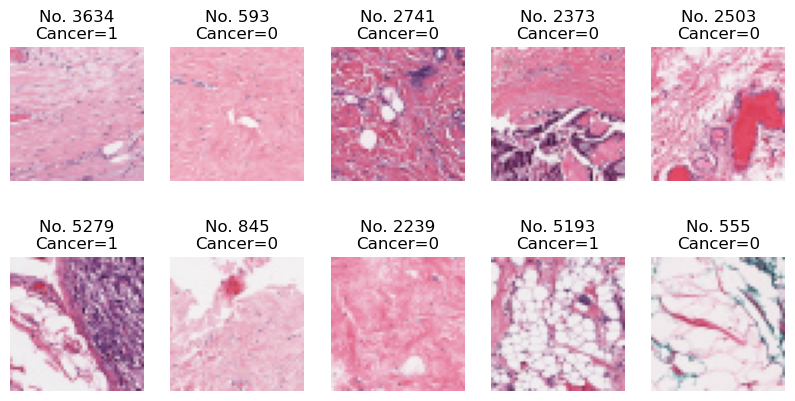

In [8]:
# 무작위 10장의 사진을 2*5 배열로 출력하기
fig, axes = plt.subplots(2, 5, figsize = (10,5))

for n,ax in enumerate(np.reshape(axes, -1)):
    i = np.random.randint(5546)
    ax.imshow(X[i])
    ax.set_title(f'No. {i}\nCancer={y[i]}')
    ax.axis('off')
    
plt.show()

In [9]:
from sklearn.manifold import TSNE
X_reshape = np.reshape(X, (X.shape[0], X.shape[1] * X.shape[2] * X.shape[3]))

tsne = TSNE(n_components=2,metric='cosine')
X_tsne = tsne.fit_transform(X_reshape)

In [12]:
df = pd.DataFrame(data = X_tsne,columns=['t1','t2'])
df['y'] = y

<Axes: xlabel='t1', ylabel='t2'>

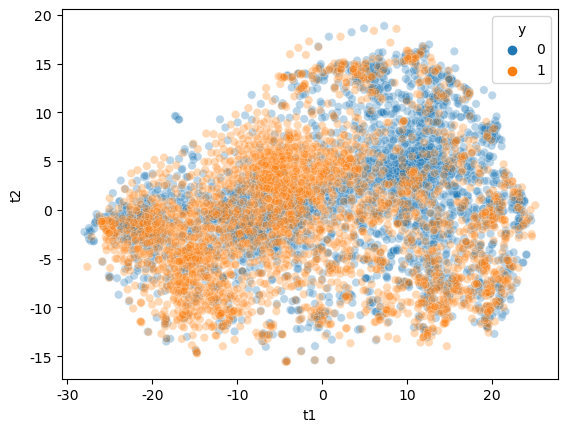

In [14]:
sns.scatterplot(data=df,x= 't1',y = 't2',hue='y',alpha=0.3)

In [20]:
print(X_reshape.shape)

tsne = PCA(n_components=256)

feat = tsne.fit_transform(X_reshape)

(5547, 7500)


In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42,n_estimators=500)

X_train, X_test, y_train, y_test = train_test_split(feat,y)
forest.fit(X_train,y_train)


RandomForestClassifier(n_estimators=500, random_state=42)

In [25]:
print(forest.score(X_test,y_test))

0.7368421052631579


In [27]:
#random forest의 정확도는 그저 그렇다.
#gradient boosting을 써보자
gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=500,max_depth=3,random_state=42)
gb.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=500, random_state=42)

In [28]:
print(gb.score(X_test,y_test))
#random forest보다 조금 더 좋은 것을 확인할 수 있지만 그렇게 유의미하지 않다. 

0.7678442682047585


In [37]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

knn_class = KNeighborsClassifier(n_neighbors=5,metric='cosine',weights='distance')
random_class = RandomForestClassifier(n_estimators=500,max_depth=5,random_state=42,class_weight='balanced_subsample')
adaboost_class = AdaBoostClassifier(n_estimators=500, random_state=42,learning_rate=0.01,algorithm='SAMME.R')
gadient_class = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,max_depth=3,random_state=42,loss='log_loss')
xgb_class = XGBClassifier(n_estimators = 500,learning_rate = 0.1, max_depth = 5)
lgb_class = LGBMClassifier()
voting_class = VotingClassifier(estimators=[('ran',random_class),
                                            ('ada',adaboost_class),
                                            ('knn',knn_class),
                                            ('grad',gb),
                                            ('xgb',xgb_class)
                                            ],voting='soft',verbose=True)

In [38]:
voting_class.fit(X_train,y_train)

[Voting] ...................... (1 of 5) Processing ran, total=  12.7s
[Voting] ...................... (2 of 5) Processing ada, total= 1.1min
[Voting] ...................... (3 of 5) Processing knn, total=   0.0s
[Voting] ..................... (4 of 5) Processing grad, total= 3.0min
[Voting] ...................... (5 of 5) Processing xgb, total=   3.2s


VotingClassifier(estimators=[('ran',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     max_depth=5,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.01,
                                                 n_estimators=500,
                                                 random_state=42)),
                             ('knn',
                              KNeighborsClassifier(metric='cosine',
                                                   weights='distance')),
                             ('grad',
                              GradientBoostingClassifier(n_estimators=500,
                                                         random_state=...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 verbose=True, voting='soft')

In [39]:
voting_class.score(X_test,y_test)
#앙상블 파라미터 튜닝을 안했기 때문에 딱히 좋아지진 않았지만 그래도 상승하는 것을 확인할 수 있다. 

0.7728911319394376

In [42]:
gb.score(X_train,y_train) #train 정확도가 너무 높은 것을 보면 과적합일 가능성도 있다.


0.9918269230769231

In [43]:
voting_class.score(X_train,y_train)

1.0

In [44]:
forest.score(X_train,y_train)

1.0

In [ ]:
#나머지도 마찬가지이다.

Text(0, 0.5, 'Feature importances')

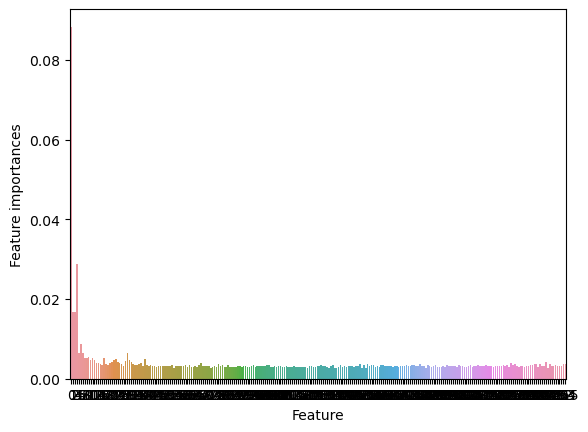

In [50]:
sns.barplot(x=[i for i in range(len(X_train[0]))], y=forest.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Feature importances')

Text(0, 0.5, 'Feature importances')

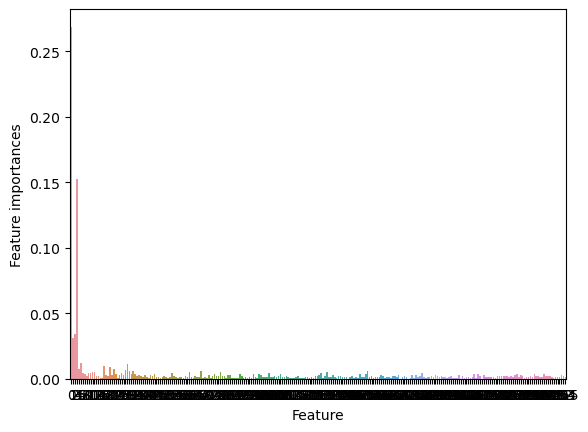

In [51]:
sns.barplot(x=[i for i in range(len(X_train[0]))], y=gb.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Feature importances')

In [ ]:
#feature importance를 확인할 수 있는 random forest와 gradient boost 모두 일정 feature에서 매우 높은 feature 영향도를 보여준다
#과적합을 없애기 위해서 너무 낮거나 너무 높은 feature를 전처리해주거나 제외하고 학습해서 결과를 지켜볼 수 있다. 

In [53]:
print(X_train)

[[ 2.41438403e+03  5.28307061e+02 -4.21029748e+02 ...  6.92266302e+01
  -1.02063731e+02  3.49438890e+01]
 [-6.34874660e+02  2.36083251e+03  6.81155172e+02 ... -6.23602645e+01
  -4.00374591e+01  2.70630081e+00]
 [-3.69712085e+03  2.20598111e+02  1.24009329e+03 ...  4.68011667e+01
  -3.63331246e+01  2.71685697e+01]
 ...
 [ 2.17425116e+03 -7.94734823e+02  1.22736542e+02 ... -5.08570604e+01
   3.03029811e+01 -1.74476358e+01]
 [ 4.60618141e+03  3.55084251e+02  2.67847199e+02 ... -1.44353754e+02
   3.88401760e+01  3.57176908e+01]
 [ 1.36980546e+03 -2.67098951e+02 -9.13985316e+00 ... -1.22077185e+01
   9.43881682e+01 -1.70504724e+01]]
